In [10]:
import numpy as np
import matplotlib.pyplot as plt
import rhanalyze
from rhanalyze.satlas import satlas

In [11]:
rhout = rhanalyze.rhout('/home/han/Source/RH/rhf1d/run')

In [18]:
CaII = rhout.atoms[0]
CaII_8542 = CaII.transition[4]

nblue = CaII_8542.Nblue
nred  = CaII_8542.Nblue + CaII_8542.Nwave

lambda_8542 = rhout.spectrum.waves[nblue:nred]
int_8542    = rhout.rays[0].I[nblue:nred]

Nwave = lambda_8542.shape[0]
Nmu   = rhout.geometry.xmu.shape[0]
print(Nwave, Nmu)
print(rhout.geometry.Nrays)

83 5
5


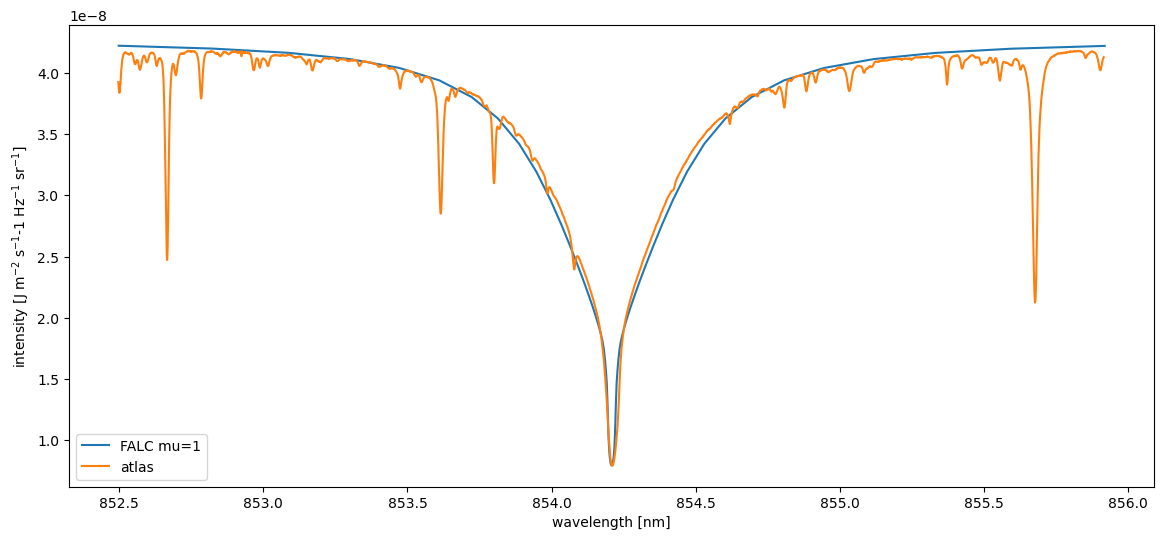

In [19]:
fts = satlas()
lambda_atlas, int_atlas, cont_atlas = fts.nmsiatlas(lambda_8542[0], lambda_8542[-1])

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(14, 6))

axs.plot(lambda_8542, int_8542, label="FALC mu=1")
axs.plot(lambda_atlas, int_atlas, label="atlas")
axs.set(xlabel = 'wavelength [nm]', ylabel = 'intensity [J m$^{-2}$ s$^{-1}$-1 Hz$^{-1}$ sr$^{-1}$]')

axs.legend()
plt.show()

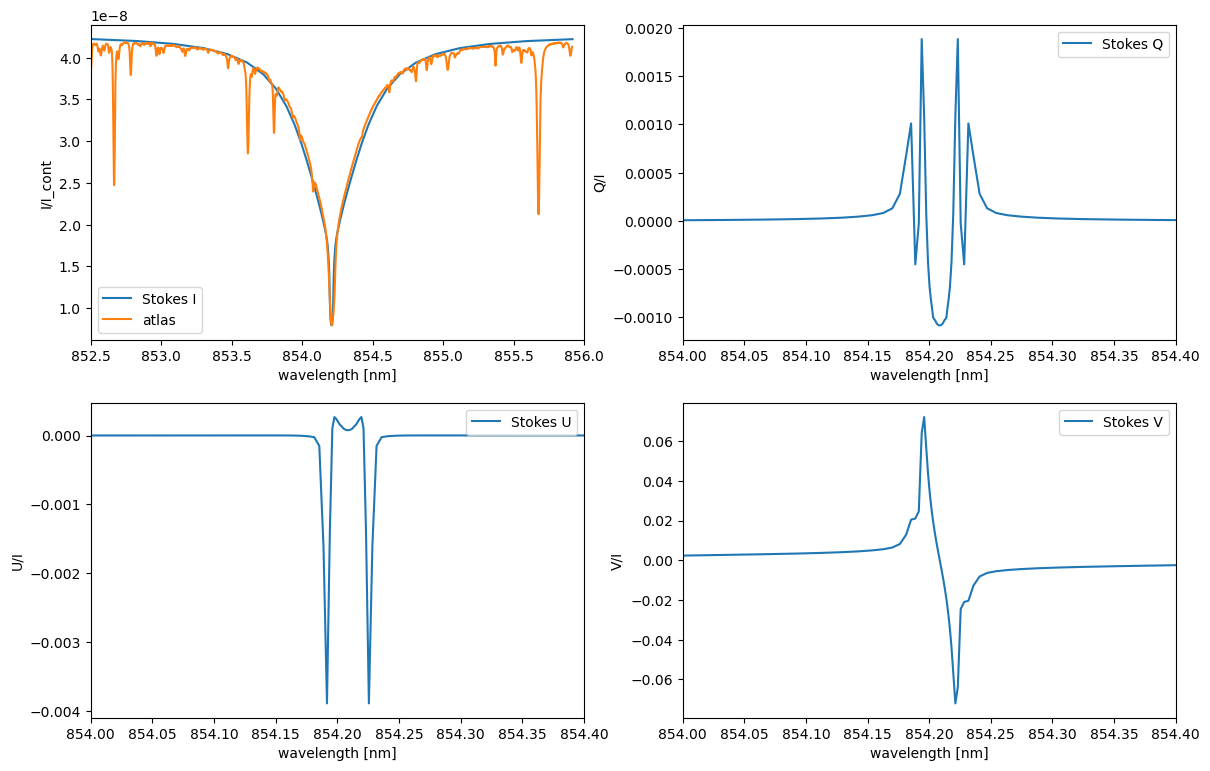

In [25]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=[14, 9])
xlim = [852.5, 856.0]
xlim_QUV = [854.0, 854.4]
plt.xlabel('wavelength [nm]')

Stokes_I = int_8542
Stokes_Q = rhout.rays[0].Q[nblue:nred] / Stokes_I
Stokes_U = rhout.rays[0].U[nblue:nred] / Stokes_I
Stokes_V = rhout.rays[0].V[nblue:nred] / Stokes_I

axs[0, 0].plot(lambda_8542, Stokes_I, label='Stokes I')
axs[0, 0].plot(lambda_atlas, int_atlas, label="atlas")
axs[0, 0].set(xlabel='wavelength [nm]', ylabel='I/I_cont', xlim=xlim)
axs[0, 0].legend()

axs[0, 1].plot(lambda_8542, Stokes_Q, label='Stokes Q')
axs[0, 1].set(xlabel='wavelength [nm]', ylabel='Q/I', xlim=xlim_QUV)
axs[0, 1].legend()

axs[1, 0].plot(lambda_8542, Stokes_U, label='Stokes U')
axs[1, 0].set(xlabel='wavelength [nm]', ylabel='U/I', xlim=xlim_QUV)
axs[1, 0].legend()

axs[1, 1].plot(lambda_8542, Stokes_V, label='Stokes V')
axs[1, 1].set(xlabel='wavelength [nm]', ylabel='V/I', xlim=xlim_QUV)
axs[1, 1].legend()
plt.show()
